In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('data.csv')

In [91]:
df

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Date,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,20-29,San Francisco Bay Area,No,NaN,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,30-39,New York City,No,NaN,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,20-29,London,No,NaN,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,40-49,Remote,Yes,2024,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,30-39,San Francisco Bay Area,No,NaN,No,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
180,EMP_5683,Marketing,Public Relations Specialist,4,20-29,New York City,False,None,None,None,True,Marketing Manager (EMP_1907)
181,EMP_0314,Sales,Business Development Representative,2,20-29,London,False,None,None,None,False,Promotion to Account Executive (Next Role)
182,EMP_7951,Engineering,Backend Engineer,1,20-29,San Francisco Bay Area,False,None,None,None,False,Promotion to Full Stack Developer (Next Role)
183,EMP_2228,Customer Service,Customer Support Representative,6,20-29,Remote,Yes,2023-04-21,Downsizing,Yes,False,None


In [92]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Date,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,20-29,San Francisco Bay Area,No,NaN,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,30-39,New York City,No,NaN,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,20-29,London,No,NaN,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,40-49,Remote,Yes,2024,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,30-39,San Francisco Bay Area,No,NaN,No,No,NaN,NaN


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee ID          185 non-null    object
 1   Department           185 non-null    object
 2   Job Title            185 non-null    object
 3   Years of Experience  185 non-null    object
 4   Age Range            184 non-null    object
 5   Location             184 non-null    object
 6   Laid Off             182 non-null    object
 7   Layoff Date          89 non-null     object
 8   Layoff Reason        182 non-null    object
 9   Severance Package    181 non-null    object
 10  Promotion            62 non-null     object
 11  Transfer             62 non-null     object
dtypes: object(12)
memory usage: 17.5+ KB


In [94]:
df.isnull().sum()

Employee ID              0
Department               0
Job Title                0
Years of Experience      0
Age Range                1
Location                 1
Laid Off                 3
Layoff Date             96
Layoff Reason            3
Severance Package        4
Promotion              123
Transfer               123
dtype: int64

In [95]:
try:
  lst = []
  for i in df['Years of Experience']:
    lst.append(int(i))
except ValueError:
  pass


In [96]:
try:
  df['Years of Experience'] = df['Years of Experience'].astype(int)
except ValueError:
  df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors='coerce')

In [97]:
df.isnull().sum()

Employee ID              0
Department               0
Job Title                0
Years of Experience      2
Age Range                1
Location                 1
Laid Off                 3
Layoff Date             96
Layoff Reason            3
Severance Package        4
Promotion              123
Transfer               123
dtype: int64

In [98]:
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mode()[0])

In [99]:
df['Years of Experience'] = df['Years of Experience'].astype(int)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee ID          185 non-null    object
 1   Department           185 non-null    object
 2   Job Title            185 non-null    object
 3   Years of Experience  185 non-null    int32 
 4   Age Range            184 non-null    object
 5   Location             184 non-null    object
 6   Laid Off             182 non-null    object
 7   Layoff Date          89 non-null     object
 8   Layoff Reason        182 non-null    object
 9   Severance Package    181 non-null    object
 10  Promotion            62 non-null     object
 11  Transfer             62 non-null     object
dtypes: int32(1), object(11)
memory usage: 16.8+ KB


In [101]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Date,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,20-29,San Francisco Bay Area,No,NaN,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,30-39,New York City,No,NaN,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,20-29,London,No,NaN,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,40-49,Remote,Yes,2024,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,30-39,San Francisco Bay Area,No,NaN,No,No,NaN,NaN


In [102]:
df['Age Range'].isnull().sum()

1

In [103]:
# Convert the age range to mean age
temp = []
for i in df['Age Range']:
  try:
      lst = i.split('-')
      temp.append((int(lst[1]) + int(lst[0]) + 1) // 2)
  except:
    temp.append(np.nan)

In [104]:
len(temp)

185

In [105]:
df['Age Range'] = pd.Series(temp)

In [106]:
df['Age Range']

0      25.0
1      35.0
2      25.0
3      45.0
4      35.0
       ... 
180    25.0
181    25.0
182    25.0
183    25.0
184    35.0
Name: Age Range, Length: 185, dtype: float64

In [107]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Date,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,25.0,San Francisco Bay Area,No,NaN,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,35.0,New York City,No,NaN,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,25.0,London,No,NaN,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,Yes,2024,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,35.0,San Francisco Bay Area,No,NaN,No,No,NaN,NaN


In [108]:
df['Laid Off'].unique()

array(['No', 'Yes', nan, 'True', 'False', 'Laid Off'], dtype=object)

In [109]:
df.loc[df['Laid Off'] == 'True', 'Laid Off'] = 'Yes'
df.loc[df['Laid Off'] == 'False', 'Laid Off'] = 'No'
df.loc[df['Laid Off'] == 'Laid Off', 'Laid Off'] = 'Yes'

In [110]:
df['Laid Off'].value_counts()

No     133
Yes     49
Name: Laid Off, dtype: int64

In [111]:
df['Laid Off'] = df['Laid Off'].fillna(df['Laid Off'].mode()[0])

In [112]:
df['Laid Off'] = df['Laid Off'].map({'Yes' : 1, 'No' : 0})

In [113]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Date,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,25.0,San Francisco Bay Area,0,NaN,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,35.0,New York City,0,NaN,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,25.0,London,0,NaN,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,2024,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,35.0,San Francisco Bay Area,0,NaN,No,No,NaN,NaN


In [114]:
df['Layoff Date'].unique()

array([nan, '2024', '2023', '2022-6-22', 'None', '2020-10-24',
       '2022-1-23', '2020-4-22', '2021-11-10', '2022-5-17', '2023-6-7',
       '2020-6-15', '2023-11-16', 'Layoff Date', '2024-02-14',
       '2023-12-08', '2024-04-12', '2023-08-23', '2024-01-19',
       '2024-03-15', '2023-05-12', '2024-05-02', '2023-11-17',
       '2024-02-09', '2023-04-21', '2024-04-19'], dtype=object)

<Axes: xlabel='Layoff Date', ylabel='Count'>

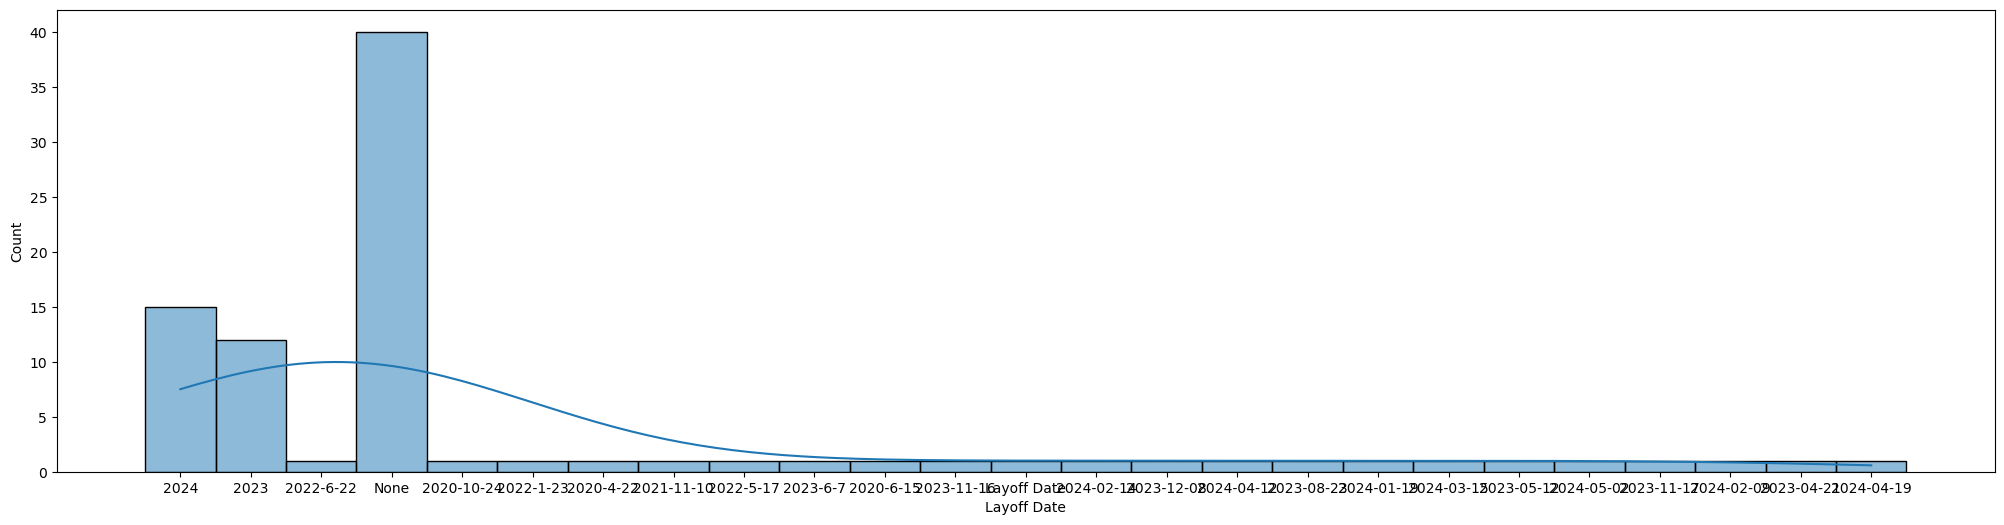

In [115]:
# Checking whether Layoff date have any significant effect on layoff status or not
plt.subplots(1, 1, figsize = (25, 6))
plt.subplot(1, 1, 1)
sns.histplot(data = df[df['Laid Off'] == 1], x = df['Layoff Date'], bins = 30, kde = True)

### Insight
- Layoff date has no significant impact on layoff status

In [116]:
#Hence we will drop this column
df.drop('Layoff Date', axis=1, inplace=True)

In [117]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,25.0,San Francisco Bay Area,0,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,35.0,New York City,0,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,25.0,London,0,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,35.0,San Francisco Bay Area,0,No,No,NaN,NaN


In [118]:
# Change the location
df['Location'].unique()

array(['San Francisco Bay Area', 'New York City', 'London', 'Remote', nan,
       'Location'], dtype=object)

In [119]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [120]:
df['Location'].value_counts()

London                    49
New York City             48
Remote                    44
San Francisco Bay Area    43
Location                   1
Name: Location, dtype: int64

In [121]:
df.loc[df['Location'] == 'Location', 'Location'] = 'Remote'


In [122]:
df.loc[df['Location'] == 'London', 'Location'] = 'Mumbai'
df.loc[df['Location'] == 'New York City', 'Location'] = 'Hyderabad'
df.loc[df['Location'] == 'San Francisco Bay Area', 'Location'] = 'Bangalore'

In [123]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,No,No,NaN,NaN


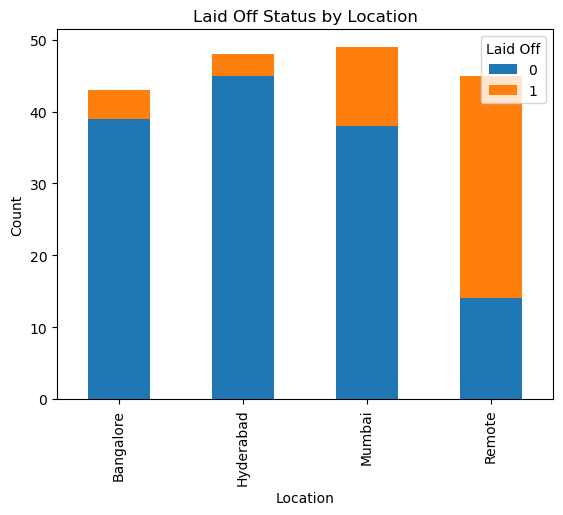

In [124]:
cross_tab = pd.crosstab(df['Location'], df['Laid Off'])

# Plot stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Laid Off Status by Location')
plt.legend(title='Laid Off')
plt.show()

In [125]:
df['Severance Package'].unique()

array(['Yes', 'No', nan, 'True', 'None', 'False', 'Severance Package'],
      dtype=object)

In [126]:
df.loc[df['Severance Package'] == 'True', 'Severance Package'] = 'Yes'
df.loc[df['Severance Package'] == 'False', 'Severance Package'] = 'No'
df.loc[df['Severance Package'] == 'Severance Package', 'Severance Package'] = 'Yes'
df.loc[df['Severance Package'] == 'None', 'Severance Package'] = 'No'

In [127]:
df['Severance Package'].value_counts()

No     113
Yes     68
Name: Severance Package, dtype: int64

In [128]:
df['Severance Package'] = df['Severance Package'].fillna(df['Severance Package'].mode()[0])

In [129]:
df['Laid Off'].value_counts()

0    136
1     49
Name: Laid Off, dtype: int64

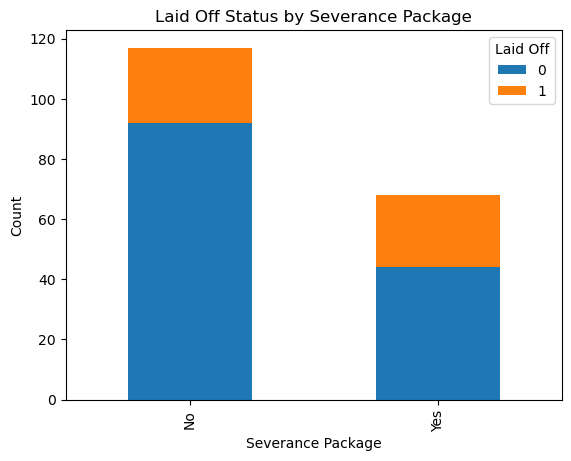

In [130]:
cross_tab = pd.crosstab(df['Severance Package'], df['Laid Off'])

# Plot stacked bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Severance Package')
plt.ylabel('Count')
plt.title('Laid Off Status by Severance Package')
plt.legend(title='Laid Off')
plt.show()

In [131]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Reason,Severance Package,Promotion,Transfer
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,Promotion,Yes,NaN,NaN
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,Promotion,No,NaN,NaN
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,No,No,NaN,NaN
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,Restructuring,Yes,NaN,NaN
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,No,No,NaN,NaN


In [132]:
df['Promotion'].unique()

array([nan, 'True', 'False', 'Promotion'], dtype=object)

In [133]:
df.loc[df['Promotion'] == 'Promotion', 'Promotion'] = 'True'

In [134]:
df['Promotion'] = df['Promotion'].fillna(df[df['Promotion'] != np.nan]['Promotion'].mode()[0])

In [135]:
df['Promotion'].value_counts()

False    154
True      31
Name: Promotion, dtype: int64

In [136]:
df.drop('Transfer', axis = 1, inplace = True)

In [137]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Reason,Severance Package,Promotion
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,Promotion,Yes,False
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,Promotion,No,False
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,No,No,False
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,Restructuring,Yes,False
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,No,No,False


In [138]:
df['Severance Package'] = df['Severance Package'].map({'Yes' : 1, 'No' : 0})
df['Promotion'] = df['Promotion'].map({'False' : 0, 'True' : 1})

In [139]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Layoff Reason,Severance Package,Promotion
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,Promotion,1,0
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,Promotion,0,0
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,No,0,0
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,Restructuring,1,0
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,No,0,0


In [140]:
df.drop('Layoff Reason', axis=1, inplace = True)

In [141]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Severance Package,Promotion
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,1,0
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,0,0
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,0,0
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,1,0
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,0,0


In [142]:
df['Department'].unique()

array(['Engineering', 'Marketing', 'Sales', 'IT', 'Finance', 'Operations',
       'Human Resources', 'Customer Service', 'Department'], dtype=object)

In [143]:
df['Department'].value_counts()

Sales               30
Engineering         28
Marketing           28
IT                  26
Finance             21
Operations          21
Human Resources     16
Customer Service    14
Department           1
Name: Department, dtype: int64

In [144]:
df.loc[df['Department'] == 'Department', 'Department'] = 'Sales'

In [145]:
df['Department'].value_counts()

Sales               31
Engineering         28
Marketing           28
IT                  26
Finance             21
Operations          21
Human Resources     16
Customer Service    14
Name: Department, dtype: int64

In [146]:
df[(df['Department'] == 'Engineering') & (df['Job Title'] == 'Software Engineer')]

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Severance Package,Promotion
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,1,0
174,EMP_1390,Engineering,Software Engineer,2,25.0,Bangalore,0,0,0


In [147]:
df[df['Department'] == 'Sales']['Job Title'].unique()

array(['Sales Associate', 'Account Executive',
       'Business Development Representative', 'Regional Sales Manager',
       'Account Manager', 'Sales Representative',
       'Business Development Specialist', 'National Sales Manager',
       'Sales Director', 'Inside Sales Representative',
       'Business Analyst', 'Sales Engineer', 'Regional Sales Director',
       'Sales Operations Manager', 'Business Development Manager',
       'Content Creator', 'Investment Analyst', 'Job Title'], dtype=object)

In [148]:
list(df[df['Department'] == 'Engineering']['Job Title'].unique())

['Software Engineer',
 'Data Scientist',
 'Quality Assurance Engineer',
 'Software Developer',
 'UI/UX Designer',
 'Machine Learning Engineer',
 'Backend Engineer',
 'Full Stack Developer',
 'Software Architect',
 'Data Engineer',
 'Front-End Developer',
 'DevOps Engineer',
 'Product Manager',
 'Software Development Manager',
 'Inventory Specialist',
 'Software Development Engineer']

In [149]:
grouped = df.groupby('Department')['Job Title']

In [150]:
df['Job Title'].value_counts()

Accountant                         9
Software Engineer                  4
Financial Analyst                  4
Public Relations Specialist        4
Supply Chain Analyst               4
                                  ..
DevOps Engineer                    1
Brand Marketing Manager            1
Sales Engineer                     1
Business Development Specialist    1
Software Development Engineer      1
Name: Job Title, Length: 90, dtype: int64

In [151]:
len(df['Job Title'].unique())

90

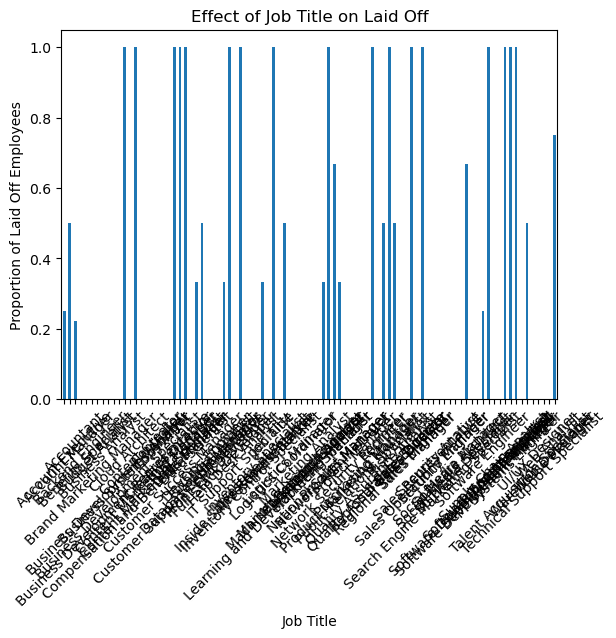

In [152]:

# Group by 'Job_Title' and calculate the mean of 'Laid_Off'
job_title_laid_off_mean = df.groupby('Job Title')['Laid Off'].mean()

# Plot the data
job_title_laid_off_mean.plot(kind='bar')
plt.title('Effect of Job Title on Laid Off')
plt.xlabel('Job Title')
plt.ylabel('Proportion of Laid Off Employees')
plt.xticks(rotation=45)
plt.show()

In [153]:
from sklearn.feature_extraction import FeatureHasher
# Initialize FeatureHasher with the desired number of features
hasher = FeatureHasher(n_features=10, input_type='string')
# Prepare job titles as an iterable over iterables of strings
job_titles = [[job_title] for job_title in df['Job Title'].astype(str)]

# Hash the job titles
hashed_features = hasher.transform(job_titles)
# Convert hashed features to DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray())
# Concatenate hashed features with the original DataFrame
df = pd.concat([df, hashed_df], axis=1)

In [154]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Severance Package,Promotion,0,1,2,3,4,5,6,7,8,9
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,0,0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,0,0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df.isnull().sum()

Employee ID            0
Department             0
Job Title              0
Years of Experience    0
Age Range              2
Location               0
Laid Off               0
Severance Package      0
Promotion              0
0                      0
1                      0
2                      0
3                      0
4                      0
5                      0
6                      0
7                      0
8                      0
9                      0
dtype: int64

In [156]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical column
one_hot_encoded = encoder.fit_transform(df[['Department']])

# Convert the encoded array into a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Department']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [157]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Severance Package,Promotion,0,...,8,9,Department_Customer Service,Department_Engineering,Department_Finance,Department_Human Resources,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,0,0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
df.head()

,Employee ID,Department,Job Title,Years of Experience,Age Range,Location,Laid Off,Severance Package,Promotion,0,...,8,9,Department_Customer Service,Department_Engineering,Department_Finance,Department_Human Resources,Department_IT,Department_Marketing,Department_Operations,Department_Sales
0,EMP_0001,Engineering,Software Engineer,5,25.0,Bangalore,0,1,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EMP_0002,Marketing,Marketing Manager,10,35.0,Hyderabad,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,EMP_0003,Sales,Sales Associate,2,25.0,Mumbai,0,0,0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,EMP_0004,IT,Network Administrator,15,45.0,Remote,1,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,EMP_0005,Engineering,Data Scientist,8,35.0,Bangalore,0,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [159]:
df['Age Range'] = df['Age Range'].fillna(df[df['Age Range'] != np.nan]['Age Range'].mode()[0])

In [160]:
df.isnull().sum()

Employee ID                    0
Department                     0
Job Title                      0
Years of Experience            0
Age Range                      0
Location                       0
Laid Off                       0
Severance Package              0
Promotion                      0
0                              0
1                              0
2                              0
3                              0
4                              0
5                              0
6                              0
7                              0
8                              0
9                              0
Department_Customer Service    0
Department_Engineering         0
Department_Finance             0
Department_Human Resources     0
Department_IT                  0
Department_Marketing           0
Department_Operations          0
Department_Sales               0
dtype: int64

In [161]:
df.drop(['Department', 'Job Title'], axis = 1, inplace = True)

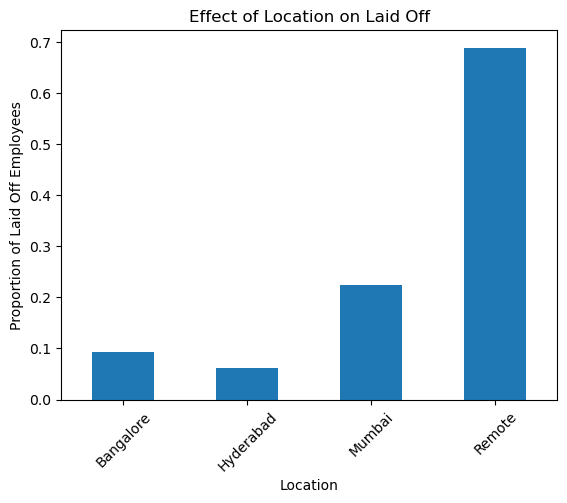

In [162]:
# Group by 'Location' and calculate the mean of 'Laid_Off'
location_laid_off_mean = df.groupby('Location')['Laid Off'].mean()

# Plot the data
location_laid_off_mean.plot(kind='bar', stacked=True)
plt.title('Effect of Location on Laid Off')
plt.xlabel('Location')
plt.ylabel('Proportion of Laid Off Employees')
plt.xticks(rotation=45)
plt.show()

### Insight
- Location has significant impact on Laif Off status

In [163]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical column
one_hot_encoded = encoder.fit_transform(df[['Location']])

# Convert the encoded array into a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Location']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [164]:
df.head()

,Employee ID,Years of Experience,Age Range,Location,Laid Off,Severance Package,Promotion,0,1,2,...,Department_Finance,Department_Human Resources,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Location_Bangalore,Location_Hyderabad,Location_Mumbai,Location_Remote
0,EMP_0001,5,25.0,Bangalore,0,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,EMP_0002,10,35.0,Hyderabad,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,EMP_0003,2,25.0,Mumbai,0,0,0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,EMP_0004,15,45.0,Remote,1,1,0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,EMP_0005,8,35.0,Bangalore,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [165]:
df.drop(['Employee ID', 'Location'], axis = 1, inplace = True)

In [166]:
df.head()

,Years of Experience,Age Range,Laid Off,Severance Package,Promotion,0,1,2,3,4,...,Department_Finance,Department_Human Resources,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Location_Bangalore,Location_Hyderabad,Location_Mumbai,Location_Remote
0,5,25.0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10,35.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,25.0,0,0,0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,45.0,1,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,35.0,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


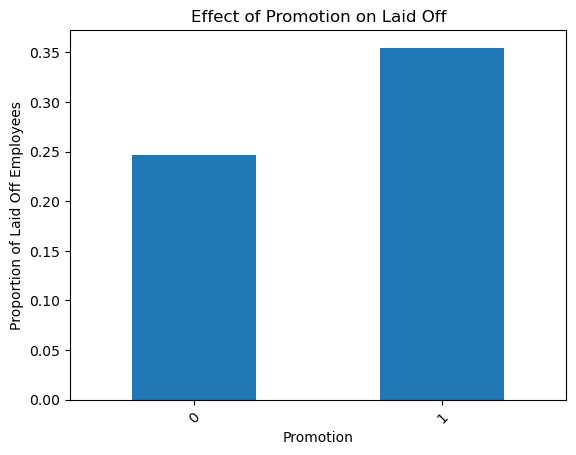

In [167]:
# Group by 'Location' and calculate the mean of 'Laid_Off'
location_laid_off_mean = df.groupby('Promotion')['Laid Off'].mean()

# Plot the data
location_laid_off_mean.plot(kind='bar', stacked=True)
plt.title('Effect of Promotion on Laid Off')
plt.xlabel('Promotion')
plt.ylabel('Proportion of Laid Off Employees')
plt.xticks(rotation=45)
plt.show()

In [168]:
# Handling Imbalanced data
df['Laid Off'].value_counts()

0    136
1     49
Name: Laid Off, dtype: int64

In [169]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = df[df['Laid Off'] == 0]
minority_class = df[df['Laid Off'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

# Shuffle the DataFrame
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [170]:
df = df_upsampled

In [171]:
df['Laid Off'].value_counts()

0    136
1    136
Name: Laid Off, dtype: int64

In [172]:
df.isnull().sum()

Years of Experience            0
Age Range                      0
Laid Off                       0
Severance Package              0
Promotion                      0
0                              0
1                              0
2                              0
3                              0
4                              0
5                              0
6                              0
7                              0
8                              0
9                              0
Department_Customer Service    0
Department_Engineering         0
Department_Finance             0
Department_Human Resources     0
Department_IT                  0
Department_Marketing           0
Department_Operations          0
Department_Sales               0
Location_Bangalore             0
Location_Hyderabad             0
Location_Mumbai                0
Location_Remote                0
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Years of Experience          272 non-null    int32  
 1   Age Range                    272 non-null    float64
 2   Laid Off                     272 non-null    int64  
 3   Severance Package            272 non-null    int64  
 4   Promotion                    272 non-null    int64  
 5   0                            272 non-null    float64
 6   1                            272 non-null    float64
 7   2                            272 non-null    float64
 8   3                            272 non-null    float64
 9   4                            272 non-null    float64
 10  5                            272 non-null    float64
 11  6                            272 non-null    float64
 12  7                            272 non-null    float64
 13  8                   

In [174]:
df.head()

,Years of Experience,Age Range,Laid Off,Severance Package,Promotion,0,1,2,3,4,...,Department_Finance,Department_Human Resources,Department_IT,Department_Marketing,Department_Operations,Department_Sales,Location_Bangalore,Location_Hyderabad,Location_Mumbai,Location_Remote
0,4,25.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,10,45.0,0,0,1,0.0,0.0,0.0,-1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5,35.0,0,1,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9,35.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,11,35.0,1,1,0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [175]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
# Example:
# df = pd.read_csv('your_dataset.csv')

# Convert all column names to strings
df.columns = df.columns.astype(str)

# Assuming your dataset is prepared with features and the target variable 'Laid_Off'
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Laid Off'])  # Features
y = df['Laid Off']  # Target variable

# Encode categorical features if necessary
# Example:
# label_encoder = LabelEncoder()
# X['categorical_feature'] = label_encoder.fit_transform(X['categorical_feature'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42))
]

# Initialize variables to store the best model and its accuracy
best_model = None
best_accuracy = 0

# Iterate over each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}, Accuracy: {accuracy}")

    # Update the best model if the current model has higher accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Evaluate the best model
if best_model is not None:
    print("\nBest Model:")
    print(best_model)
    print("Best Accuracy:", best_accuracy)
    print("Classification Report:")
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
else:
    print("No best model found.")


Model: Random Forest, Accuracy: 0.9090909090909091
Model: Logistic Regression, Accuracy: 0.8545454545454545
Model: Support Vector Machine, Accuracy: 0.6363636363636364

Best Model:
RandomForestClassifier(random_state=42)
Best Accuracy: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        25
           1       0.86      1.00      0.92        30

    accuracy                           0.91        55
   macro avg       0.93      0.90      0.91        55
weighted avg       0.92      0.91      0.91        55



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
import pickle

# Save the best model (Random Forest) to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)